In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


### Reading the images in batches


In [35]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50


In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../Dataset/Potato/",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [10]:
class_names = dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
len(dataset), 68 * 32

(68, 2176)

There are 68 batches with 32 images in each batch except the last one


In [16]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())


(32, 256, 256, 3)
[0 0 1 2 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1]


# Visualizing the Image


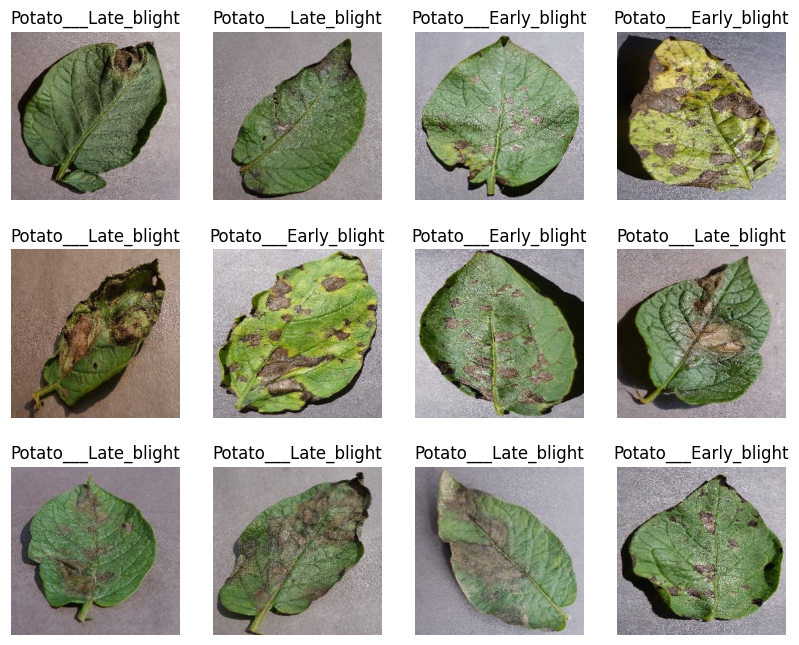

In [34]:
for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10, 8))
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("int64"))
        plt.axis("off")
        plt.title(f"{class_names[label_batch[i]]}")

# RUN AGAIN AND AGAIN FOR SHUFFLE

## Splitting into train test and validation

Train : 80% </br>
Test : 10% </br>
Validation : 10% </br>


In [36]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [37]:
train_ds = dataset.take(54)
len(train_ds)


54

In [43]:
rest_ds = dataset.skip(54)
len(rest_ds)


14

In [41]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [44]:
val_ds = rest_ds.take(7)
len(val_ds)


7

In [45]:
test_ds = rest_ds.skip(7)
len(test_ds)


7

Making a function for splitting the dataset


In [54]:
def get_dataset_partitions(
    ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000
):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    ds_size = len(ds)
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [55]:
train_ds, val_ds, test_ds = get_dataset_partitions(ds=dataset)
len(train_ds), len(test_ds), len(val_ds)

(54, 8, 6)

In [ ]:
# train_ds.cache().shuffle(1000).prefetch()